In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix , recall_score, f1_score, classification_report
from collections import Counter

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore') #to filter warning

In [131]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Explore Data**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [134]:
df.duplicated().sum()

0

## **Analysis**

In [135]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

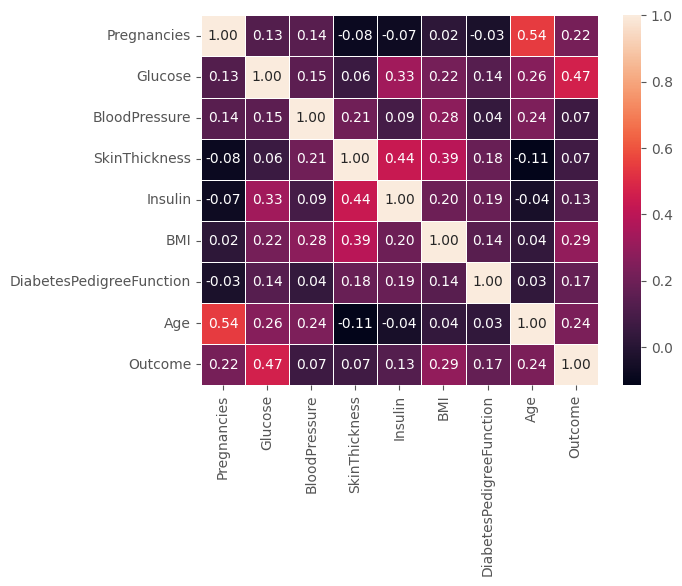

In [136]:
sns.heatmap(df.corr(),annot=True,fmt='.2f', linewidth=0.5)

<Axes: xlabel='Outcome', ylabel='count'>

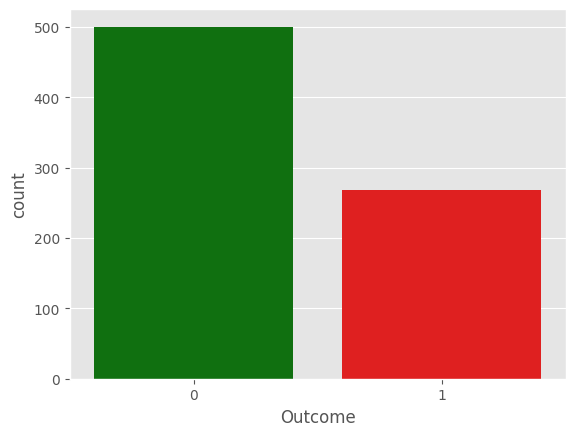

In [137]:
sns.countplot(x='Outcome', data=df, palette=['g','r'])

In [138]:
max=df[df['Outcome']==0]
min=df[df['Outcome']==1]
max.shape, min.shape

((500, 9), (268, 9))

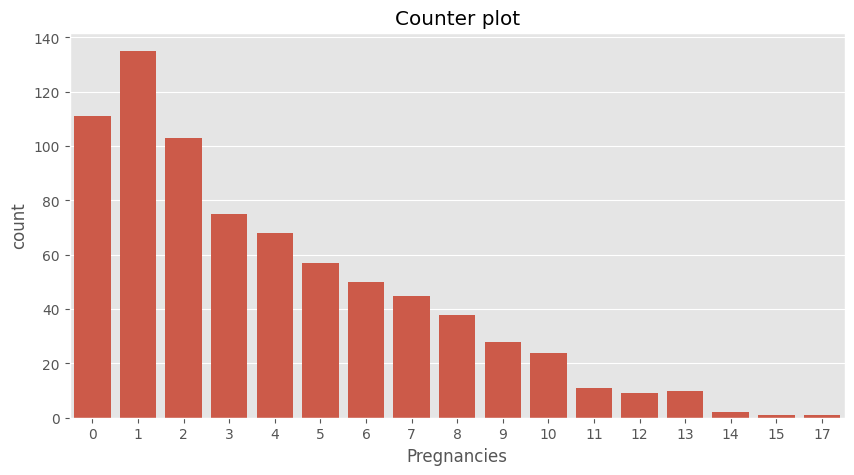

In [139]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pregnancies', data=df)
plt.title('Counter plot')
plt.show()

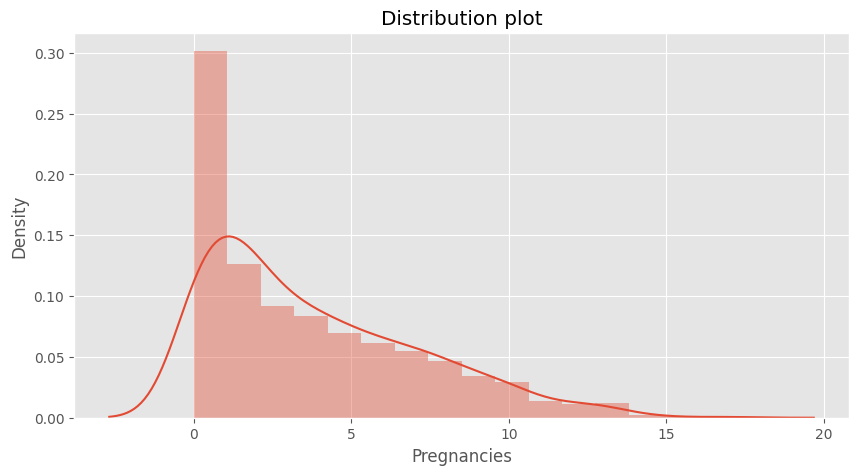

In [140]:
plt.figure(figsize=(10,5))
sns.distplot(df['Pregnancies'])
plt.title('Distribution plot')
plt.show()

## **Create Model**

In [141]:
x= df.drop('Outcome', axis=1)
y= df['Outcome']

In [142]:
ROS=RandomOverSampler(random_state=42)
x_res, y_res=ROS.fit_resample(x,y)


In [143]:
print('Old dataset shape{}'.format(Counter(y)))
print('New dataset shape{}'.format(Counter(y_res)))

Old dataset shapeCounter({0: 500, 1: 268})
New dataset shapeCounter({1: 500, 0: 500})


In [144]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2)

In [145]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [146]:
def cal(model):
    pre=model.predict(x_test)
    acc=accuracy_score(y_test, pre)
    recall=recall_score(y_test, pre)
    f1=f1_score(y_test, pre)

    result1.append(acc)
    result2.append(recall)
    result3.append(f1)

    sns.heatmap(confusion_matrix(y_test, pre), annot=True)
    print(model)
    print('Accuracy: ', acc)
    print('Recall: ', recall)
    print('F1: ', f1)

In [147]:
model1= LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()
Accuracy:  0.685
Recall:  0.7037037037037037
F1:  0.7069767441860464


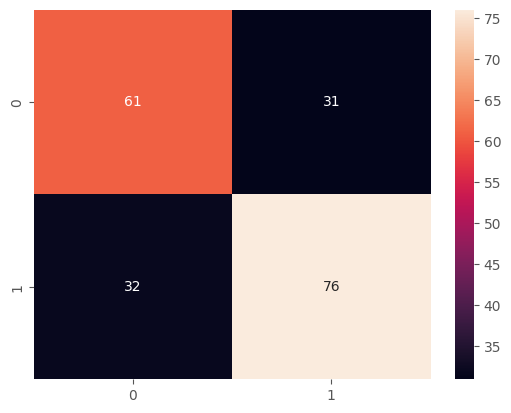

In [148]:
cal(model1)

In [149]:
model2= SVC()
model2.fit(x_train, y_train)

SVC()

SVC()
Accuracy:  0.675
Recall:  0.6574074074074074
F1:  0.6859903381642511


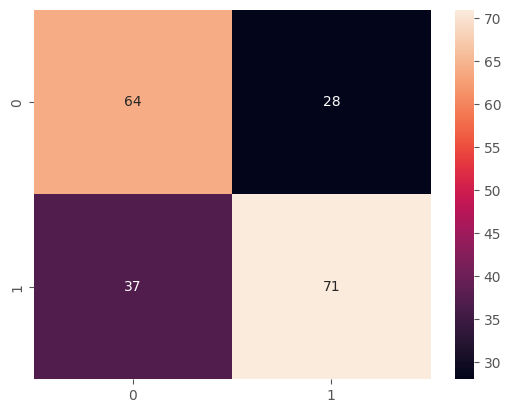

In [150]:
cal(model2)

In [151]:
model3= RandomForestClassifier(n_estimators=1000 ,class_weight='balanced')
model3.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)
Accuracy:  0.83
Recall:  0.9166666666666666
F1:  0.8534482758620691


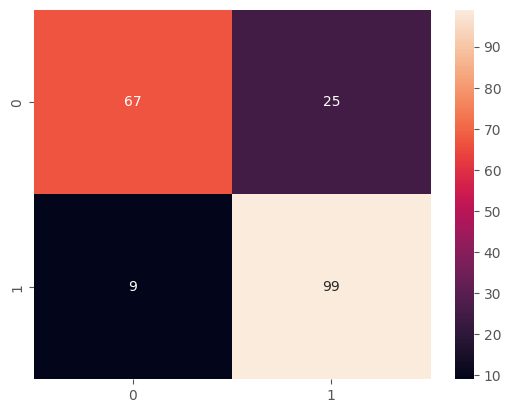

In [152]:
cal(model3)

In [153]:
model4= GradientBoostingClassifier(n_estimators=1000)
model4.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=1000)

GradientBoostingClassifier(n_estimators=1000)
Accuracy:  0.835
Recall:  0.8888888888888888
F1:  0.8533333333333333


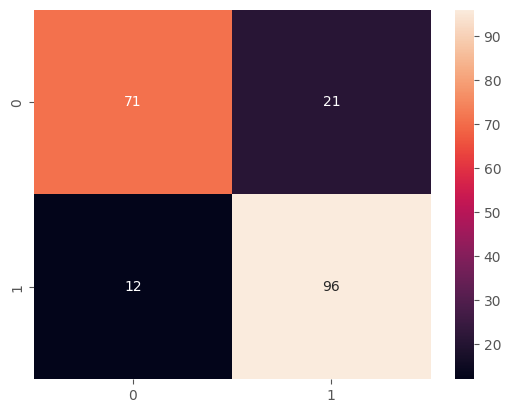

In [154]:
cal(model4)

In [155]:
FR=pd.DataFrame({'Algorithm':columns, 'Accuracy':result1, 'Recall':result2, 'F1':result3})
FR

,Algorithm,Accuracy,Recall,F1
0,LogisticRegression,0.685,0.703704,0.706977
1,SVC,0.675,0.657407,0.685990
2,RandomForestClassifier,0.830,0.916667,0.853448
3,GradientBoostingClassifier,0.835,0.888889,0.853333


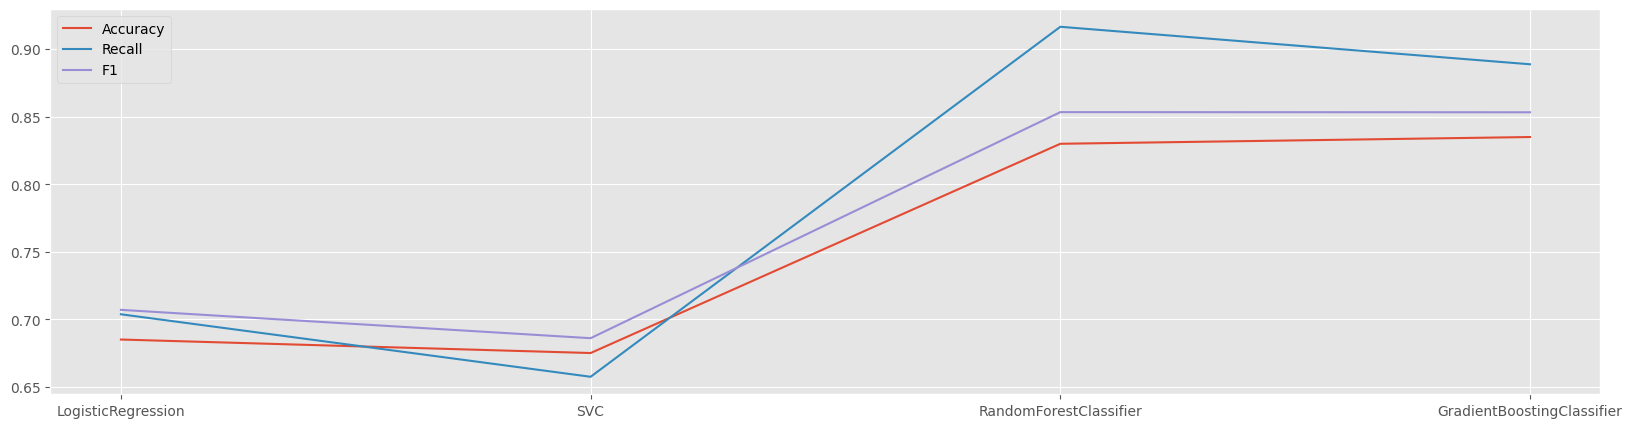

In [156]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FR.Algorithm, result1, label='Accuracy')
plt.plot(FR.Algorithm, result2, label='Recall')
plt.plot(FR.Algorithm, result3, label='F1')
plt.legend()